NF2178-Yidan Chen-A2


Google Collab Link
https://colab.research.google.com/drive/10xpEIRJtBP2D3qR2qgPVs-P28QQAoW4a?usp=sharing

In [1]:

#import stuff here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.3-py3-none-any.whl size=59056 sha256=0466f2f2db57c8e0cf4dcd7f5834ebbe06ac28d3210a080ba35faddf20eaf5c7
  Stored in directory: /root/.cache/pip/wheels/ac/67/a7/4e0b4172d5415933127e819d7d7080ae08a6220949ad2f6de5
Successfully built bioinfokit


In [2]:
from google.colab import drive
# Mount file to google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_excel('/content/drive/MyDrive/2178/INF2178_A2_data.xlsx',sheet_name='ChildCareCentres')

In [4]:
df.head(10)

,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y
5,6,1021,Centennial College Progress Campus Child Care ...,Non Profit Agency,941 PROGRESS AVE,M1G 3T8,24,Community College/University,Centennial College Of Applied Arts & Technology,10,20,32,0,0,62,Y,Y
6,7,1029,Air-O-Down Child Care Centre,Non Profit Agency,7 HAWKSDALE RD,M3K 1W3,6,Public High School,Downsview Secondary School,10,15,24,0,0,49,Y,Y
7,8,1031,Cedarbrae Day Nurseries (20 Greencrest),Commercial Agency,20 GREENCREST CIRCT,M1G 1B8,24,High Rise Apartment,Greencrest Property,0,0,16,0,30,46,Y,Y
8,9,1037,Tiago Avenue Community Child Care,Non Profit Agency,145 TIAGO AVE,M4B 2A6,19,Public Elementary School,Victoria Park Public School,0,0,21,0,30,51,Y,Y
9,10,1041,Ledbury Park Child Care Program,Non Profit Agency,95 FALKIRK ST,M5M 4K1,8,Public Elementary School,Ledbury Park Public School,0,0,24,39,90,153,Y,Y


In [5]:
#checking data types
data_types = df.dtypes
data_types

_id             int64
LOC_ID          int64
LOC_NAME       object
AUSPICE        object
ADDRESS        object
PCODE          object
ward            int64
bldg_type      object
BLDGNAME       object
IGSPACE         int64
TGSPACE         int64
PGSPACE         int64
KGSPACE         int64
SGSPACE         int64
TOTSPACE        int64
subsidy        object
cwelcc_flag    object
dtype: object

In [6]:
#checking data shape
df.shape

(1063, 17)

In [7]:
# Summary statistics for numerical columns
print("Summary Statistics:\n", df.describe())

Summary Statistics:
                _id        LOC_ID         ward      IGSPACE      TGSPACE  \
count  1063.000000   1063.000000  1063.000000  1063.000000  1063.000000   
mean    532.000000   8087.888053    12.511759     3.896519    11.600188   
std     307.005972   5151.252693     7.032050     6.091782    12.088152   
min       1.000000   1013.000000     1.000000     0.000000     0.000000   
25%     266.500000   1862.000000     6.000000     0.000000     0.000000   
50%     532.000000   8826.000000    12.000000     0.000000    10.000000   
75%     797.500000  13245.000000    19.000000    10.000000    15.000000   
max    1063.000000  14504.000000    25.000000    30.000000    90.000000   

           PGSPACE      KGSPACE      SGSPACE     TOTSPACE  
count  1063.000000  1063.000000  1063.000000  1063.000000  
mean     24.258702    14.257761    21.661336    75.674506  
std      18.577416    20.493290    30.423503    47.816518  
min       0.000000     0.000000     0.000000     6.000000  
25%

In [8]:
# Checking for missing values
missing_values_key_columns = df.isnull().sum()
missing_values_key_columns
#as building name is not closely relevant to this study, we will ignore this variable with missing values

_id              0
LOC_ID           0
LOC_NAME         0
AUSPICE          0
ADDRESS          0
PCODE            0
ward             0
bldg_type        0
BLDGNAME       348
IGSPACE          0
TGSPACE          0
PGSPACE          0
KGSPACE          0
SGSPACE          0
TOTSPACE         0
subsidy          0
cwelcc_flag      0
dtype: int64

In [9]:
# Calculate the total number of spaces for each category, grouped by 'AUSPICE'
totals_by_auspice = df.groupby('AUSPICE')[['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE']].sum()

# This will give you a DataFrame with the sum of each space category, indexed by 'AUSPICE' type
print(totals_by_auspice)


                               IGSPACE  TGSPACE  PGSPACE  KGSPACE  SGSPACE
AUSPICE                                                                   
Commercial Agency                 1584     5345    10463     1358     2110
Non Profit Agency                 2206     6441    14444    13772    20856
Public (City Operated) Agency      352      545      880       26       60


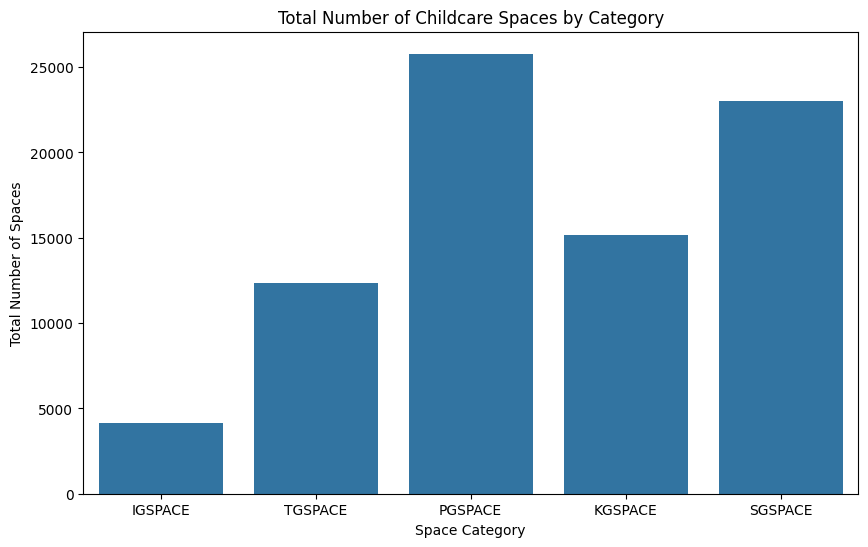

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculating the total number of each childcare space category
totals = df[['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE']].sum()

# Plotting the histogram/bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=totals.index, y=totals.values)
plt.title('Total Number of Childcare Spaces by Category')
plt.ylabel('Total Number of Spaces')
plt.xlabel('Space Category')
plt.show()


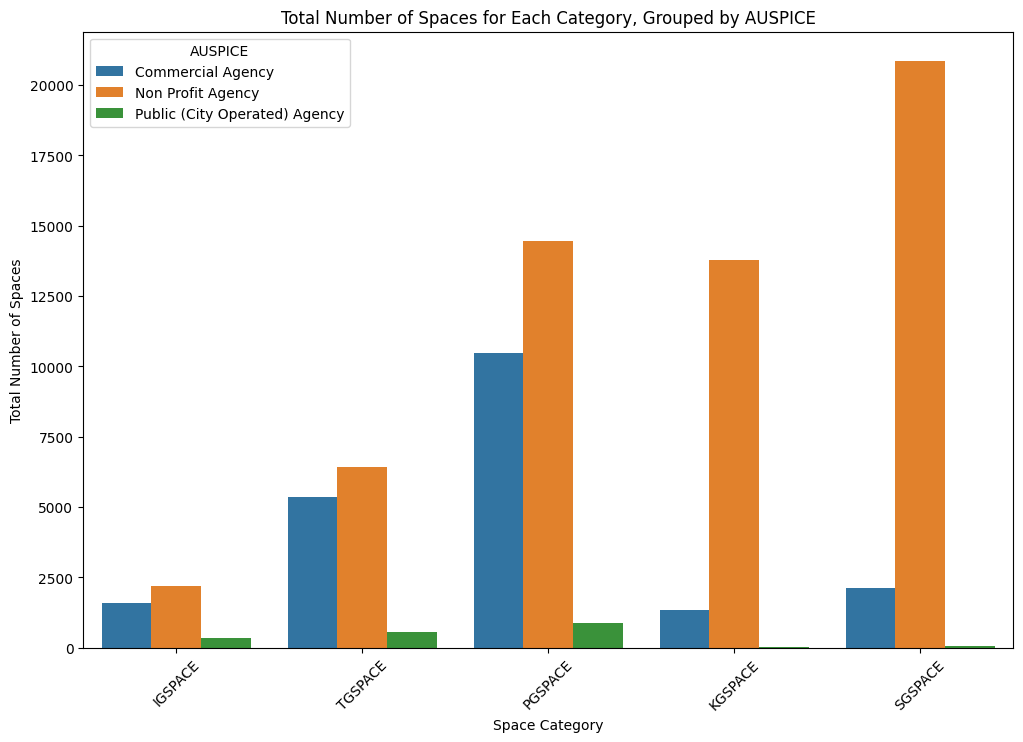

In [11]:
# First, calculate the totals by 'AUSPICE'
totals_by_auspice = df.groupby('AUSPICE')[['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE']].sum().reset_index()

# Melt the DataFrame to make it suitable for a seaborn barplot
melted_data = pd.melt(totals_by_auspice, id_vars=['AUSPICE'], var_name='Space Category', value_name='Total Spaces')

# Now, create the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Space Category', y='Total Spaces', hue='AUSPICE', data=melted_data)
plt.title('Total Number of Spaces for Each Category, Grouped by AUSPICE')
plt.xticks(rotation=45)
plt.ylabel('Total Number of Spaces')
plt.xlabel('Space Category')
plt.legend(title='AUSPICE')

plt.show()


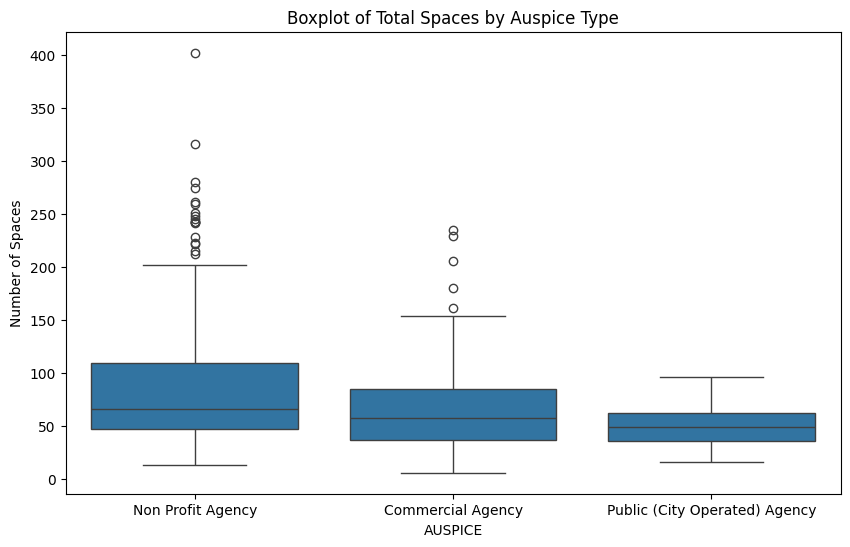

In [12]:
#Make boxplot for total spaces by auspice type
plt.figure(figsize=(10, 6))
sns.boxplot(x='AUSPICE', y='TOTSPACE', data=df)
plt.title('Boxplot of Total Spaces by Auspice Type')
plt.xlabel('AUSPICE')
plt.ylabel('Number of Spaces')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 24.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


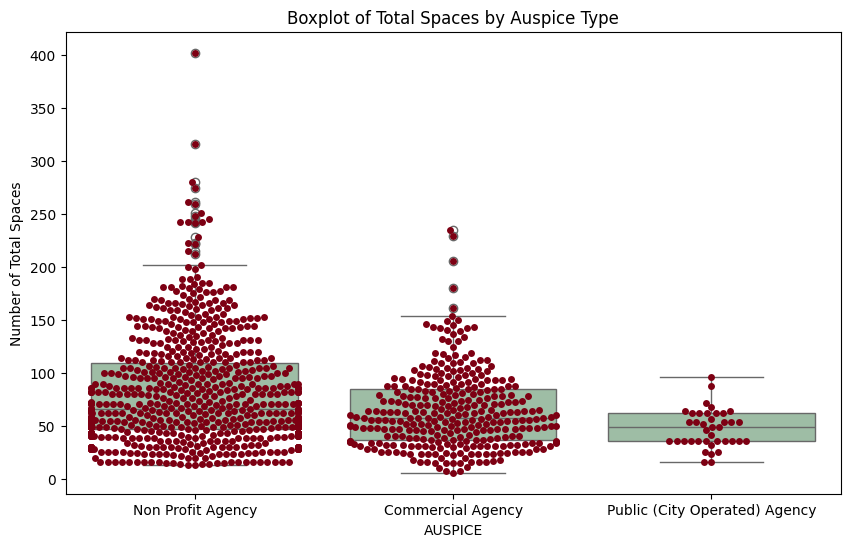

In [14]:
# Reshape the dataframe for seaborn
data_melted = pd.melt(df.reset_index(), id_vars=['AUSPICE'], value_vars=['TOTSPACE'])

# Rename the columns for clarity
data_melted.columns = ['AUSPICE', 'Variable', 'Value']

# Generate the boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='AUSPICE', y='Value', data=data_melted, color='#99c2a2')
ax = sns.swarmplot(x='AUSPICE', y='Value', data=data_melted, color='#7d0013', size=5)
plt.title('Boxplot of Total Spaces by Auspice Type')
plt.xlabel('AUSPICE')
plt.ylabel('Number of Total Spaces')
plt.show()


**One-Way ANOVA**

In [15]:
# The OLS model for performing the ANOVA
model = ols('TOTSPACE ~ C(AUSPICE)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

anova_table

,sum_sq,df,F,PR(>F)
C(AUSPICE),9.611211e+04,2.0,21.843051,5.057716e-10
Residual,2.332065e+06,1060.0,NaN,NaN


In [16]:
#post hoc test using Tukey's HSD
res = stat()
res.tukey_hsd(df=df, res_var='TOTSPACE', xfac_var='AUSPICE', anova_model='TOTSPACE ~ C(AUSPICE)')
res.tukey_summary


/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,16.806538,3.993722,29.619353,4.356853,0.006071
1,Non Profit Agency,Public (City Operated) Agency,36.177966,8.673910,63.682022,4.369046,0.005901
2,Commercial Agency,Public (City Operated) Agency,19.371429,-10.141900,48.884757,2.180132,0.272554


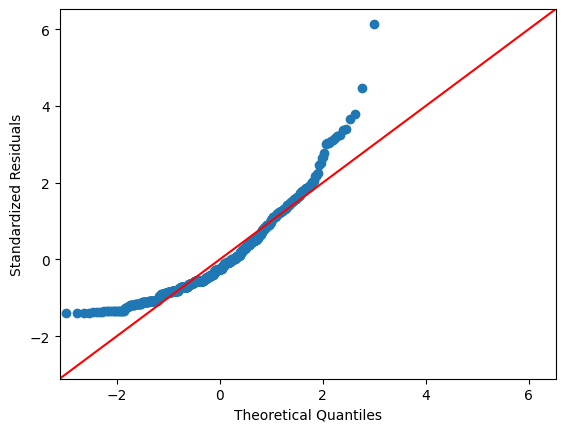

In [17]:
#checking model diagnostics
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assumption 1: Residuals are standardized and normally distributed
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()



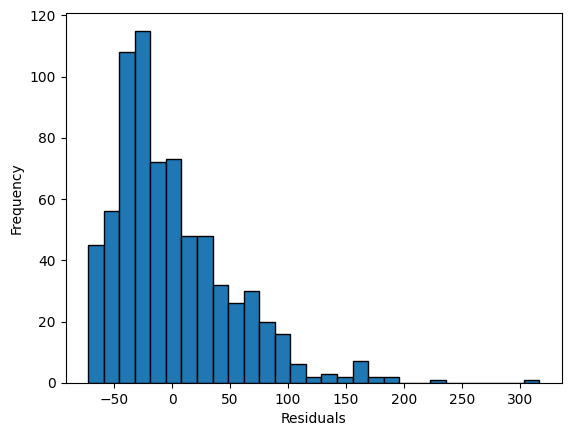

In [18]:
# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [19]:
#Assumption 1.1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(model.resid)
print(w,pvalue)

0.901775598526001 1.4964898448030214e-25


In [20]:
#Assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed

res.levene(df=df, res_var='TOTSPACE', xfac_var='AUSPICE')
res.levene_summary

,Parameter,Value
0,Test statistics (W),9.1994
1,Degrees of freedom (Df),2.0000
2,p value,0.0001


In [21]:
# Count the occurrences of 'Y' and 'N' for subsidy
subsidy_yes_no_counts = df['subsidy'].value_counts()
subsidy_counts_table = subsidy_yes_no_counts.rename(index={'Y': 'Subsidy Provided', 'N': 'No Subsidy Provided'}).reset_index()
subsidy_counts_table.columns = ['Subsidy Status', 'Count']

# Count the occurrences of 'Y' and 'N' for cwelcc_flag
cwelcc_flag_yes_no_counts = df['cwelcc_flag'].value_counts()
cwelcc_flag_counts_table = cwelcc_flag_yes_no_counts.rename(index={'Y': 'Participates in CWELCC', 'N': 'Does Not Participate in CWELCC'}).reset_index()
cwelcc_flag_counts_table.columns = ['CWELCC Participation Status', 'Count']

print(subsidy_counts_table)
print(cwelcc_flag_counts_table)



        Subsidy Status  Count
0     Subsidy Provided    718
1  No Subsidy Provided    345
      CWELCC Participation Status  Count
0          Participates in CWELCC    926
1  Does Not Participate in CWELCC    137


**Two-Way ANOVA**

In [22]:
# First,we would reshape the DataFrame for plotting.
# After melting, we'll have three columns: one for 'AUSPICE', one for 'cwelcc_flag', and one for the values from 'TOTSPACE'.
data_melted = pd.melt(df, id_vars=['AUSPICE', 'cwelcc_flag'], value_vars=['TOTSPACE'])

In [23]:
data_melted

,AUSPICE,cwelcc_flag,variable,value
0,Non Profit Agency,Y,TOTSPACE,164
1,Non Profit Agency,Y,TOTSPACE,83
2,Non Profit Agency,Y,TOTSPACE,102
3,Non Profit Agency,Y,TOTSPACE,65
4,Non Profit Agency,Y,TOTSPACE,26
...,...,...,...,...
1058,Non Profit Agency,Y,TOTSPACE,112
1059,Non Profit Agency,N,TOTSPACE,60
1060,Non Profit Agency,N,TOTSPACE,49
1061,Non Profit Agency,Y,TOTSPACE,56


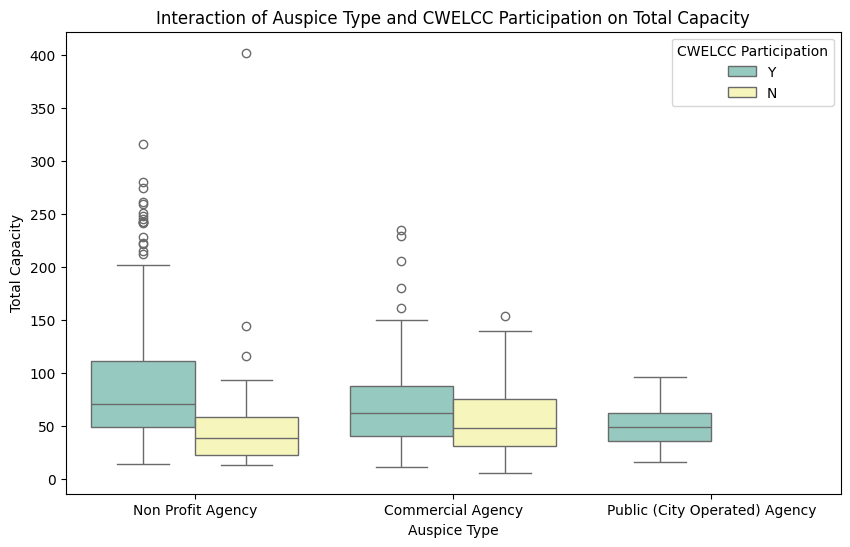

In [24]:
# Finally, create the boxplot.
plt.figure(figsize=(10, 6))
sns.boxplot(x='AUSPICE', y='value', hue='cwelcc_flag', data=data_melted, palette='Set3')
plt.title('Interaction of Auspice Type and CWELCC Participation on Total Capacity')
plt.xlabel('Auspice Type')
plt.ylabel('Total Capacity')
plt.legend(title='CWELCC Participation')

plt.show()

In [25]:
# The OLS model for performing the ANOVA
model=ols('value ~ C(AUSPICE) + C(cwelcc_flag) + C(AUSPICE):C(cwelcc_flag)', data=data_melted).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(AUSPICE),1.083348e+05,2.0,25.188746,6.095400e-07
C(cwelcc_flag),3.768832e+04,1.0,17.525698,3.070092e-05
C(AUSPICE):C(cwelcc_flag),2.949561e+04,2.0,6.857975,1.098398e-03
Residual,2.275187e+06,1058.0,NaN,NaN


In [26]:
res = stat()
res.anova_stat(df=data_melted, res_var='value', anova_model='value ~ C(AUSPICE) + C(cwelcc_flag) + C(AUSPICE):C(cwelcc_flag)')
res.anova_summary

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '


,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,1.083348e+05,54167.406210,25.188746,6.095400e-07
C(cwelcc_flag),1.0,3.768832e+04,37688.323276,17.525698,3.070092e-05
C(AUSPICE):C(cwelcc_flag),2.0,2.949561e+04,14747.806131,6.857975,1.098398e-03
Residual,1058.0,2.275187e+06,2150.460631,NaN,NaN


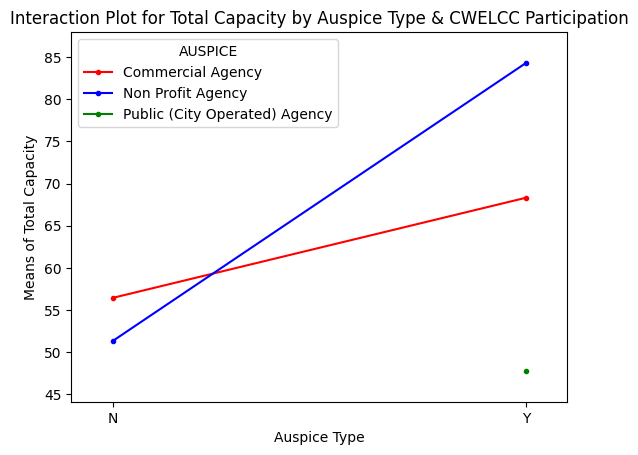

In [28]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig = interaction_plot(x=data_melted['cwelcc_flag'],trace=data_melted['AUSPICE'],response=data_melted['value'],colors=['red','blue','green'])
plt.title('Interaction Plot for Total Capacity by Auspice Type & CWELCC Participation')
plt.xlabel('Auspice Type')
plt.ylabel('Means of Total Capacity')
plt.show()

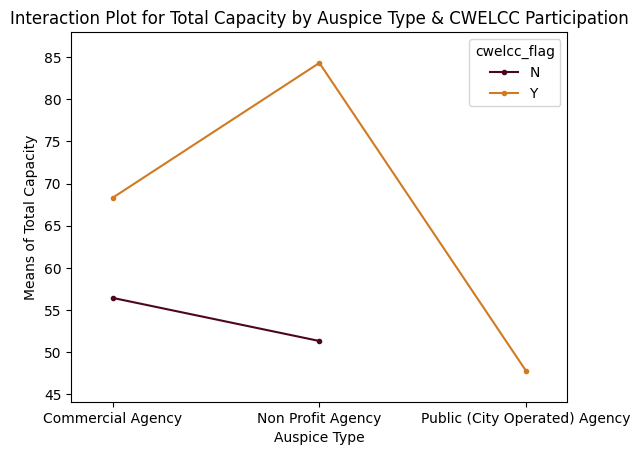

In [27]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig = interaction_plot(x=data_melted['AUSPICE'],trace=data_melted['cwelcc_flag'],response=data_melted['value'],colors=['#4c061d','#d17a22'])
plt.title('Interaction Plot for Total Capacity by Auspice Type & CWELCC Participation')
plt.xlabel('Auspice Type')
plt.ylabel('Means of Total Capacity')
plt.show()

In [29]:
res.tukey_hsd(df=data_melted, res_var='value',xfac_var='AUSPICE',anova_model='value ~ C(AUSPICE) + C(cwelcc_flag) + C(AUSPICE):C(cwelcc_flag)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,17.119417,9.787652,24.451182,7.750298,0.001000
1,Non Profit Agency,Public (City Operated) Agency,34.334610,16.429346,52.239874,6.364868,0.001000
2,Commercial Agency,Public (City Operated) Agency,17.215193,-1.241554,35.671940,3.095956,0.073556


In [30]:
res.tukey_hsd(df=data_melted, res_var='value',xfac_var='cwelcc_flag',anova_model='value ~ C(AUSPICE) + C(cwelcc_flag) + C(AUSPICE):C(cwelcc_flag)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  war

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Y,N,24.101945,15.772582,32.431309,8.029722,0.001


In [31]:
res.tukey_hsd(df=data_melted,res_var='value',xfac_var=['AUSPICE','cwelcc_flag'], anova_model='value ~ C(AUSPICE) + C(cwelcc_flag) + C(AUSPICE):C(cwelcc_flag)')
res.tukey_summary.head()

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(Non Profit Agency, Y)","(Non Profit Agency, N)",32.990302,12.999232,52.981373,6.662830,0.001
1,"(Non Profit Agency, Y)","(Commercial Agency, Y)",15.993434,5.864514,26.122354,6.375101,0.001
2,"(Non Profit Agency, Y)","(Commercial Agency, N)",27.876118,12.994318,42.757918,7.562847,0.001
3,"(Non Profit Agency, Y)","(Public (City Operated) Agency, Y)",36.540220,14.719584,58.360857,6.761020,0.001
4,"(Non Profit Agency, Y)","(Public (City Operated) Agency, N)",0.000000,-inf,inf,0.000000,0.900
